In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\asus\\OneDrive\\Documents\\GitHub\\Machine_Learning_Practice\\End-to-End_MLProject.ipynb\\placement.csv')

In [41]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

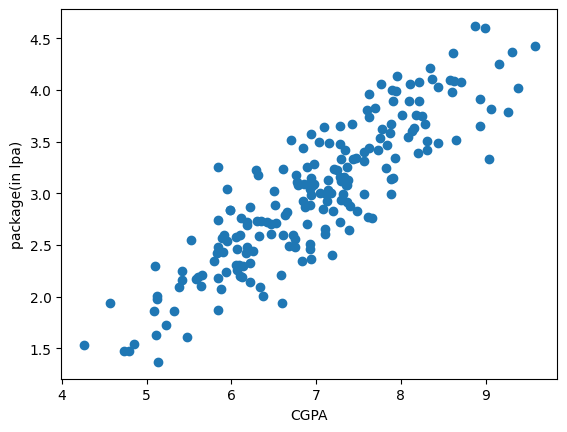

In [42]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [43]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [46]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package(in lpa)')

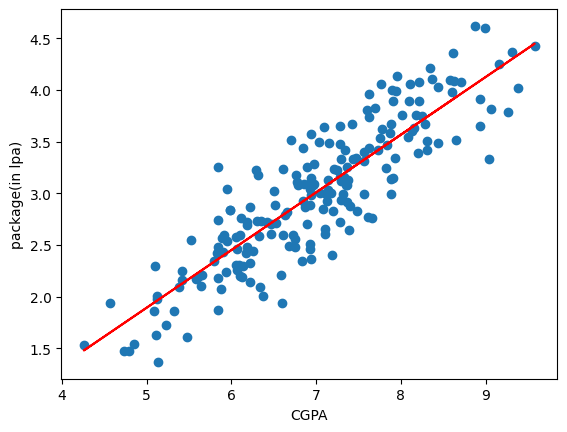

In [47]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [48]:

# y = mx+b
m = lr.coef_
b = lr.intercept_
print(m,b)

[0.55795197] -0.8961119222429144


In [49]:
# Applying regression metrics on these
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr.predict(X_test)

In [50]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [51]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [52]:
print("MsE", mean_squared_error(y_test, y_pred))

MsE 0.12129235313495527


In [53]:
print("RMsE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMsE 0.34827051717731616


In [54]:
print("R2 score", r2_score(y_test, y_pred))

R2 score 0.780730147510384


In [55]:
# Adjusted R2 Score
r2 = r2_score(y_test, y_pred)
print(X_test.shape)
adjusted_r2 = 1 - ((1-r2)*(40-1)/(40-1-1))
print("Adjusted_r2_score", adjusted_r2)

(40, 1)
Adjusted_r2_score 0.7749598882343415


In [56]:
#  we will randomly add a col and r score will increase, but adj r2 score vo thda km hojaega

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.270065,3.26
1,5.12,0.827244,1.98
2,7.82,0.319346,3.25
3,7.42,0.063253,3.67
4,6.94,0.575607,3.57


Text(0, 0.5, 'package(in lpa)')

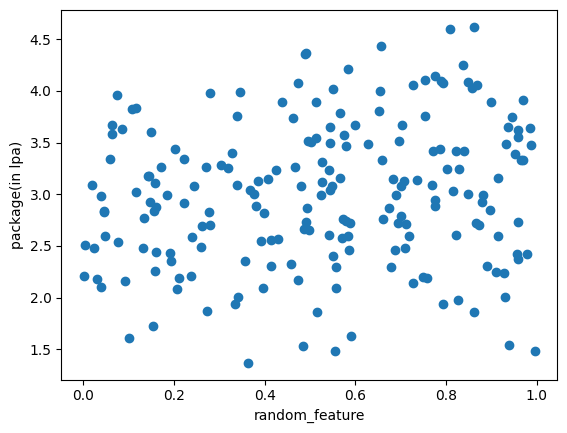

In [57]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in lpa)')
# completely random, no pattern

In [58]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]


In [59]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression()
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7821573192965936


In [61]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7703820392585716

In [62]:

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
113,6.94,2.87,2.37
128,7.93,3.54,3.34
47,5.84,2.66,3.26
93,6.79,2.68,3.08
159,8.71,3.08,4.08


Text(0, 0.5, 'Package(in lpa)')

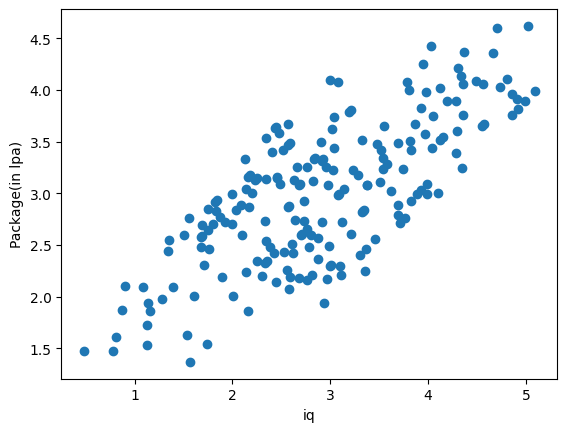

In [63]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [64]:
np.random.randint(-100,100)


30

In [65]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8044763299904771


In [66]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7939074829629353